In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, inspect, Table

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
print(engine)

Engine(sqlite:///hawaii.sqlite)


In [14]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [15]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)
cnx = engine.connect()
meta = MetaData(engine, reflect=True)

<ipython-input-19-88df41ffc826>:4: SADeprecationWarning: The MetaData.reflect flag is deprecated and will be removed in a future release.   Please use the MetaData.reflect() method.
  meta = MetaData(engine, reflect=True)


In [20]:
measurement = meta.tables['measurement']
for c in measurement.columns:
    print(c)
    
station = meta.tables['station']
for s in station.columns:
    print(s)

measurement.id
measurement.station
measurement.date
measurement.prcp
measurement.tobs
station.id
station.station
station.name
station.latitude
station.longitude
station.elevation


In [27]:
inspector = inspect(engine)
m_columns = inspector.get_columns('measurement')
for column in m_columns:
    print(column['name'])

id
station
date
prcp
tobs


# Exploratory Precipitation Analysis

In [97]:
# Find the most recent date in the data set.('2017-08-23')

station_qry = engine.execute("""
select date, avg(tobs) as tobs
from measurement
  group by date
;
""").fetchall()

pd.DataFrame(station_qry, columns=['date','temp']).max()['date']

'2017-08-23'

<AxesSubplot:xlabel='date'>

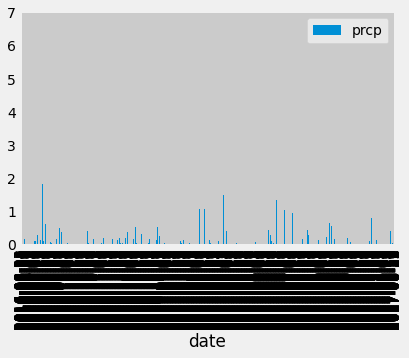

In [107]:
prcp_q = engine.execute("""
select date, prcp
from measurement
  where date between '2016-08-23' and '2017-08-23'
  and prcp != 'NaN'
  order by date
;
""").fetchall()

date_prcp = pd.DataFrame(prcp_q, columns=['date','prcp'])
date_prcp = date_prcp.set_index('date')
date_prcp.plot(kind='bar')


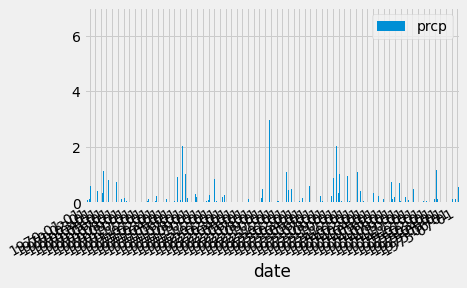

In [118]:
import matplotlib.dates as mdates
import datetime

ax = date_prcp.plot(kind='bar')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()

plt.show()

Text(0, 0.5, 'Inches')

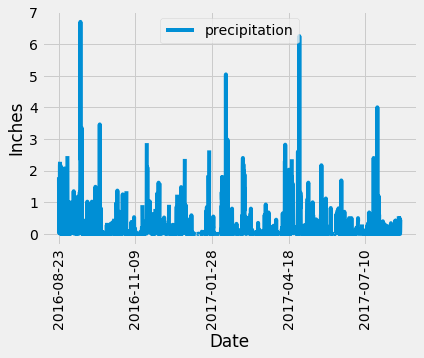

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
values = []
rows = ['count','mean','std','min','25%','50%','75%','max']
values.append(date_prcp['prcp'].sum())
values.append(date_prcp['prcp'].mean())
values.append(date_prcp['prcp'].std())
values.append(date_prcp['prcp'].min())
values.append(date_prcp['prcp'].quantile(0.25))
values.append(date_prcp['prcp'].quantile(0.5))
values.append(date_prcp['prcp'].quantile(0.75))
values.append(date_prcp['prcp'].max())
prcp_sum = pd.DataFrame({
    "precipitation":values
}, index=rows)
prcp_sum

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [66]:
# Design a query to calculate the total number stations in the dataset
num_stations = engine.execute('select count(station) from station;').fetchall()
num_stations = num_stations[0][0]
num_stations

9

In [68]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
obs_count = engine.execute("""
select station
      ,count(tobs) as tobs
from measurement
  group by station
  order by tobs desc
""").fetchall()
obs_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#[(54.0, 85.0, 71.66378066378067)]
most_active = engine.execute("""
select station
      ,MIN(tobs)
      ,MAX(tobs)
      ,AVG(tobs)
from measurement
where station = 'USC00519281'
  
""").fetchall()
most_active

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

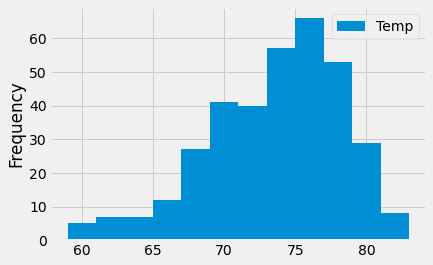

In [82]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_temp = engine.execute("""
select station
      ,tobs
from measurement
where station = 'USC00519281'
and date between '2016-08-23' and '2017-08-23'
  
""").fetchall()
most_temp = pd.DataFrame(most_temp, columns=['Station', 'Temp'])
most_temp.plot.hist(bins=12)

# Close Session

In [83]:
session.close()